In [2]:
import numpy as np
from numpy import linspace
from numpy.lib.scimath import sqrt
from scipy import pi
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
from scipy.optimize import fsolve
from pylab import plot

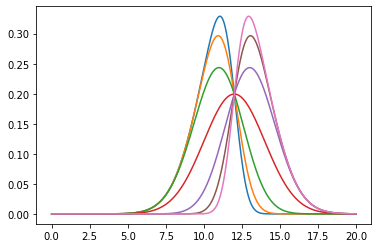

In [3]:
# Plot the probability density function of the skew normal distribution for different param values
n = 2**10

e = 12.0 # location
w = 2.0 # scale

x = linspace(0,20,n) 

for a in range(-3,4):
    p = skewnorm.pdf(x,a,e,w)
    plot(x,p)

## Find probability density

### Let's work out an example

In [47]:
student = 17.80
mean = 14.28
min = 8.30
max = 17.8
STD = 2

### Find delta

Since the [equation](https://en.wikipedia.org/wiki/Skew_normal_distribution) 
$$skew = \frac{4 - \pi}{2}\frac{\left(\delta\sqrt{2/\pi}\right)^3}{\left(1-2\delta^2/\pi\right)^{3/2}}$$
depends only on $\delta$ we use it first to derive its value.

We use the [non parametric skew](https://en.wikipedia.org/wiki/Nonparametric_skew) defined by 
$$skew = \frac{(\mu-\nu)}{\sigma}$$
where $\mu$ is the mean, $\nu$ is the median (approximated by min+max/2) and $\sigma$ is the std

<ipython-input-42-e1e18aa7febb>:3: RuntimeWarning: invalid value encountered in power
  func = lambda delta: skew - (4 - pi)/2 * (delta * sqrt(2/pi))**3 / (1 - 2 * delta**2 / pi)**(3/2)


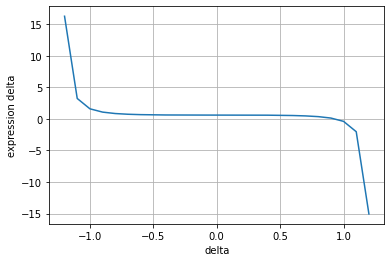

In [42]:
skew = (mean - (max + min)/2) / STD

func = lambda delta: skew - ((4 - pi)/2) * ((delta * sqrt(2/pi))**3) / (np.power(1 - (2 * delta**2) / pi, 3/2))

delta = linspace(-10,10, 201)

plt.plot(delta, func(delta))
plt.xlabel("delta")
plt.ylabel("expression delta")
plt.grid()
plt.show()

In [45]:
delta_guess = 1
delta_solution = fsolve(func, delta_guess)
delta = delta_solution[0]
delta

0.9376120324634186

### Find w

The scale w can be derived when we know $\delta$ from the [equation](https://en.wikipedia.org/wiki/Skew_normal_distribution)
$$\mathrm{Var}=w^2(1-\frac{2\delta^2}{\pi})$$
We choose (from experience) a std of 2

In [46]:
w = STD / sqrt(1 - 2 * delta**2 / pi)
w

3.013958888091499

### Find e

We derive the location from the [equation](https://en.wikipedia.org/wiki/Skew_normal_distribution)
$$\mathrm{Mean} = e + w \delta \sqrt{2/\pi}$$

In [48]:
e = mean - w * delta * sqrt(2 / pi)
e

12.025238775589365

### Conclusion

The last parameter is a, given by the [equation](https://en.wikipedia.org/wiki/Skew_normal_distribution)
$$\delta = \frac{\alpha}{1+\alpha^2}$$

In [50]:
a = delta / sqrt(1 - delta**2)
a

2.6967416452744923

In [51]:
# The parameters are
delta, w, e, a

(0.9376120324634186, 3.013958888091499, 12.025238775589365, 2.6967416452744923)

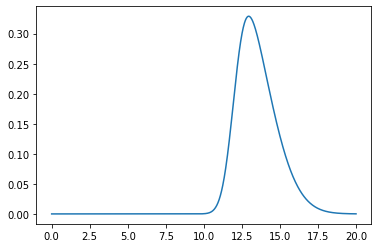

In [74]:
n = 2**10
x = linspace(0,20, n) 

p = skewnorm.pdf(x,a,e,w)
plot(x, p)

In [78]:
# This is a good student
skewnorm.cdf(student, a, e, w)

0.9962683733992322

In [84]:
# It's a 5 stars student
stars = int((skewnorm.cdf(student, a, e, w) * 5).round())
stars

5